In [112]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

**Информация о наборе данных:**

Этот набор данных связан с красными вариантами португальского вина "Vinho Verde".

Классы упорядочены и не сбалансированы (например, нормальных вин намного больше, чем отличных или плохих). Алгоритмы обнаружения выбросов могут использоваться для обнаружения нескольких превосходных или плохих вин. Кроме того, мы не уверены, что все входные переменные релевантны. Поэтому было бы интересно протестировать методы выбора функций.

В данном исследовании попробуем проанализировать качество вина **quality** (от 0 до 10, где 0 - ето совсем плохо, а 10 - превосходно) в зависимости от кислотности **pH** и его крепости **alcolol**

Ссылка на датасет: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [120]:
wine_data = pd.read_csv("winequality-red.csv", delimiter=";")
# options = [5, 7]
# res_data = wine_data.loc[wine_data['quality'].isin(options)]
wine_data

,fixed acidity,alcohol,quality
0,7.4,9.4,5
1,7.8,9.8,5
2,7.8,9.8,5
3,11.2,9.8,6
4,7.4,9.4,5
5,7.4,9.4,5
6,7.9,9.4,5
7,7.3,10.0,7
8,7.8,9.5,7
9,7.5,10.5,5


Визуализируем данные на графике. Каждая точка показывает, к какому классу она принадлежит.

4- вино плохое

5-6 - среднее

7 - отличное

0      Annotation(7.4, 9.4, '5.0')
1      Annotation(7.8, 9.8, '5.0')
2      Annotation(7.8, 9.8, '5.0')
3     Annotation(11.2, 9.8, '6.0')
4      Annotation(7.4, 9.4, '5.0')
5      Annotation(7.4, 9.4, '5.0')
6      Annotation(7.9, 9.4, '5.0')
7       Annotation(7.3, 10, '7.0')
8      Annotation(7.8, 9.5, '7.0')
9     Annotation(7.5, 10.5, '5.0')
10     Annotation(6.7, 9.2, '5.0')
11    Annotation(7.5, 10.5, '5.0')
12     Annotation(5.6, 9.9, '5.0')
13     Annotation(7.8, 9.1, '5.0')
14     Annotation(8.9, 9.2, '5.0')
15     Annotation(8.9, 9.2, '5.0')
16    Annotation(8.5, 10.5, '7.0')
17     Annotation(8.1, 9.3, '5.0')
18       Annotation(7.4, 9, '4.0')
19     Annotation(7.9, 9.2, '6.0')
20     Annotation(8.9, 9.4, '6.0')
21     Annotation(7.6, 9.7, '5.0')
22     Annotation(7.9, 9.5, '5.0')
23     Annotation(8.5, 9.4, '5.0')
24     Annotation(6.9, 9.7, '6.0')
dtype: object

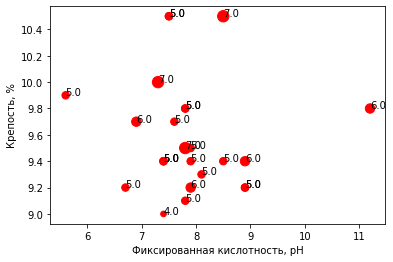

In [114]:
x = wine_data['fixed acidity']
y = wine_data['alcohol']
qual = wine_data['quality']**2.5
plt.scatter(x, y, s = qual, c = 'red')
plt.xlabel('Фиксированная кислотность, pH')
plt.ylabel('Крепость, %')
# wine_data.plot(x = 'pH', y = 'alcohol', kind = 'scatter')
ax = plt.gca()
wine_data.apply(lambda x: ax.annotate(x['quality'], (x['fixed acidity'], x['alcohol'])), axis=1)

Обозначаем предикторы и отклики.

Предикторы - фиксированная кислотность и крепость вина

Отклики - качество вина

In [105]:
xw = pd.DataFrame(wine_data.drop(['quality'], axis = 1)) #Предикторы
yw = pd.DataFrame(wine_data['quality']).values.ravel() #Отклики

Используем метод из импортированной библиотеки sklearn.neighbors.


*   **n_neighbors** = число соседей
*   **p** = исп. расстояние (1 - Манхэттенское расстояние, 2 - Евклидово, 3 и более - Чебышёва)



In [106]:
neigh = KNeighborsClassifier(n_neighbors = 3, p = 2)
neigh.fit(xw, yw)

KNeighborsClassifier(n_neighbors=3)

Тестовые данные. Новый объект, который нужно классифицировать и его классификация

In [116]:
new_obj = [7, 9.5]
neigh.predict([new_obj])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([5])

Вероятности отнесения к классам 4, 5, 6 и 7:




In [117]:
neigh.predict_proba([new_obj])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[0.        , 0.66666667, 0.33333333, 0.        ]])

Выведим расстояние до k соседей в порядке уменьшения (первый массив - расстояния, второй - ид. объектов)
Данный метод возвращает индексы ближайших соседей с НУЛЯ, что не соответствует индексации в таблице (Мы получили индексы [3, 15, 14] в таблице соотв. -> [4, 16, 15])

In [111]:
neigh.kneighbors([new_obj])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


(array([[7.03420216, 9.17877988, 9.17877988]]), array([[ 3, 15, 14]]))